## GMM

EM algorithm can be used to estimate parameters in a Gaussian mixture models and the hidden parameter (proportion of  each distribution). Here's an example. 

Q: Suppose the weight of male $W_m$ follows $N(\mu_1,\sigma_1^2)$ and the weight of female $W_f$ follows $N(\mu_2,\sigma_2^2)$. We observe a group of data points $X = (x_1,x_2,...x_n)$, which are extracted from either $W_m$ or $W_f$, what are estimated $\mu_1,\mu_2,\sigma_1,\sigma_2,\pi_1, \pi_2$?

### Simple Random Normal

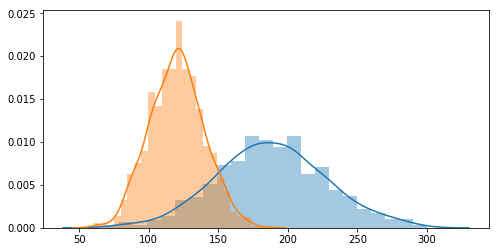

In [1]:
# Generate samples
import numpy as np
import pandas as pd
import random
from scipy.stats import norm
from matplotlib import pyplot as plt
import seaborn as sns
import math
%matplotlib inline

rng = np.random.RandomState(0)

n = 1000
mu1,sigma1 = 190,40
mu2,sigma2 = 120,20
wm = rng.normal(mu1,sigma1,n)
wf = rng.normal(mu2,sigma2,n)
weight = np.where(np.random.rand(n)<0.75,wm,wf)
# weight = np.concatenate([np.random.normal(mu, sigma, int(pi*n))
#                     for pi, mu, sigma in zip([0.75,0.25],[190,120],[40,20])])

plt.figure(figsize=(8,4))
sns.distplot(pd.Series(wm),hist=True)
sns.distplot(pd.Series(wf),hist=True)

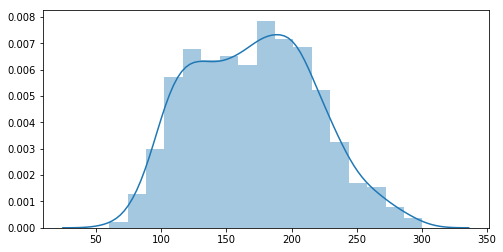

In [2]:
plt.figure(figsize=(8,4))
sns.distplot(pd.Series(weight),hist=True)

In [3]:
def gauss(x,mu,sigma):
    y = -((x-mu)/sigma)**2/2
    res = math.exp(y)/(math.sqrt(2*math.pi)*sigma)
    return res

In [4]:
def calcEM(weight, mp_init, mu_init, sigma_init, iters):
    N = len(weight)
    mp, fp = mp_init[0], mp_init[1]
    mmu, fmu = mu_init[0], mu_init[1]
    msigma, fsigma = sigma_init[0], sigma_init[1]
    mpi = list(range(N))
    fpi = list(range(N))
    cur = [mp,fp,mmu,msigma,fmu,fsigma]
    now = []
    
    times = 0
    while times < iters:
        i = 0
        for x in weight:
            mpi[i] = mp*gauss(x,mmu,msigma)
            fpi[i] = fp*gauss(x,fmu,fsigma)
            s = mpi[i] + fpi[i]
            mpi[i]/=s
            fpi[i]/=s
            i += 1
        
        mn = sum(mpi)
        fn = sum(fpi)
        mp = mn/N
        fp = fn/N
        mmu = sum([p*x for (p,x) in zip(mpi,weight)])/mn
        fmu = sum([p*x for (p,x) in zip(fpi,weight)])/fn
        msigma = math.sqrt(sum([p*(x-mmu)**2 for (p,x) in zip(mpi,weight)])/mn)
        fsigma = math.sqrt(sum([p*(x-fmu)**2 for (p,x) in zip(fpi,weight)])/fn)
        
        now = [mp,fp,mmu,msigma,fmu,fsigma]
        if isSame(cur,now):
            break
        cur = now
        print ("Times:\t {}".format(times))
        print ("Male mean: {}, sigma: {}".format(mmu,msigma))
        print ("Female mean: {}, sigma: {}".format(fmu,fsigma))
        print ("Male portion: {}, female portio: {}".format(mp,fp))
        times += 1
    return now

def isSame(lst1,lst2):
    return (sum([(i-j)**2 for (i,j) in zip(lst1,lst2)]) < 0.001)
        

In [5]:
calcEM(weight,[0.5,0.5],[max(weight),min(weight)],[10,10],1000)

Times:	 0
Male mean: 215.13007816003736, sigma: 26.03659120551256
Female mean: 136.64870607553314, sigma: 26.81415068035291
Male portion: 0.4344809376670046, female portio: 0.5655190623329955
Times:	 1
Male mean: 212.39933466476813, sigma: 28.77979299157981
Female mean: 137.5779137855607, sigma: 28.925647610722823
Male portion: 0.4433149228239076, female portio: 0.5566850771760922
Times:	 2
Male mean: 210.86908846945695, sigma: 30.128254718686033
Female mean: 137.89256938366267, sigma: 29.783131389148277
Male portion: 0.45021052300279374, female portio: 0.5497894769972062
Times:	 3
Male mean: 209.8487403930172, sigma: 30.94073765081503
Female mean: 137.94855751387612, sigma: 30.180409586940787
Male portion: 0.4561714223934288, female portio: 0.5438285776065712
Times:	 4
Male mean: 209.09466750196327, sigma: 31.479705423185155
Female mean: 137.86402685985564, sigma: 30.355488621334974
Male portion: 0.46164598622052916, female portio: 0.5383540137794709
Times:	 5
Male mean: 208.496437369

Times:	 75
Male mean: 189.44585106200435, sigma: 39.23586636663553
Female mean: 118.39080807963099, sigma: 19.61109201228208
Male portion: 0.7368450701178096, female portio: 0.26315492988218936
Times:	 76
Male mean: 189.32108981028864, sigma: 39.29588698100527
Female mean: 118.29113474447124, sigma: 19.540634298638526
Male portion: 0.7385085829650853, female portio: 0.2614914170349142
Times:	 77
Male mean: 189.2003924167955, sigma: 39.35404941944577
Female mean: 118.19527257627652, sigma: 19.472309696462172
Male portion: 0.7401169626916991, female portio: 0.2598830373083003
Times:	 78
Male mean: 189.08364835830017, sigma: 39.410393116410184
Female mean: 118.10307490512562, sigma: 19.40605841220588
Male portion: 0.7416718228939799, female portio: 0.25832817710602
Times:	 79
Male mean: 188.97074821584354, sigma: 39.46495832257865
Female mean: 118.0144000130373, sigma: 19.341822590341785
Male portion: 0.7431747480076616, female portio: 0.256825251992338
Times:	 80
Male mean: 188.861583897

[0.7767475172604519,
 0.22325248273954676,
 186.44226103224233,
 40.69683199121285,
 116.14116233247667,
 17.836039930639174]

### Multivariate Normal

In [6]:
import scipy.stats as st
from scipy.stats import multivariate_normal as mvn
from numpy.core.umath_tests import matrix_multiply as mm

/Applications/anaconda/envs/python3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  This is separate from the ipykernel package so we can avoid doing imports until


In [7]:
def f(x, y):
    z = np.column_stack([x.ravel(), y.ravel()])
    return (0.1*st.multivariate_normal([0,0], 1*np.eye(2)).pdf(z) +
            0.4*st.multivariate_normal([3,3], 2*np.eye(2)).pdf(z) +
            0.5*st.multivariate_normal([0,5], 3*np.eye(2)).pdf(z))

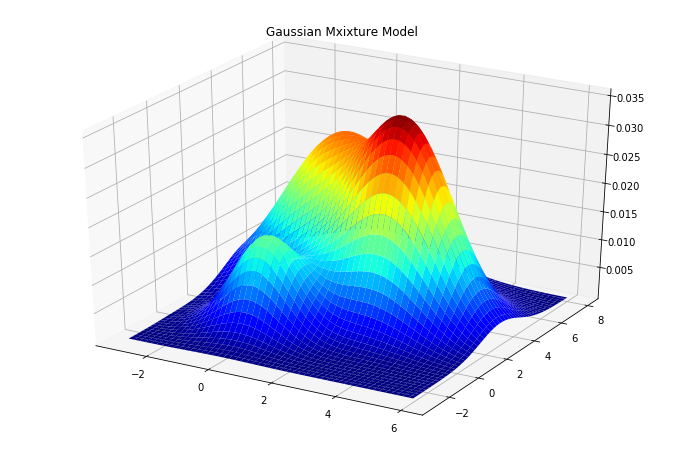

In [9]:
s = 200
x = np.linspace(-3, 6, s)
y = np.linspace(-3, 8, s)
X, Y = np.meshgrid(x, y)
Z = np.reshape(f(X, Y), (s, s))

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='jet')
plt.title('Gaussian Mxixture Model');

In [10]:
#f(np.arange(3), np.arange(3))
z = np.column_stack([X.ravel(),Y.ravel()]) # (40000,2)
z_pdf=.1*st.multivariate_normal([0,0], 1*np.eye(2)).pdf(z) # (40000,)

In [11]:
def em_gmm_vect(xs, pis, mus, sigmas, tol=0.01, max_iter=100):

    n, p = xs.shape
    k = len(pis)

    ll_old = 0
    for i in range(max_iter):
        exp_A = []
        exp_B = []
        ll_new = 0

        # E-step
        ws = np.zeros((k, n))
        for j in range(k):
            ws[j, :] = pis[j] * mvn(mus[j], sigmas[j]).pdf(xs)
        ws /= ws.sum(0)

        # M-step
        pis = ws.sum(axis=1)
        pis /= n

        mus = np.dot(ws, xs)
        mus /= ws.sum(1)[:, None]

        sigmas = np.zeros((k, p, p))
        for j in range(k):
            ys = xs - mus[j, :]
            sigmas[j] = (ws[j,:,None,None] * mm(ys[:,:,None], ys[:,None,:])).sum(axis=0)
        sigmas /= ws.sum(axis=1)[:,None,None]

        # update complete log likelihoood
        ll_new = 0
        for pi, mu, sigma in zip(pis, mus, sigmas):
            ll_new += pi*mvn(mu, sigma).pdf(xs)
        ll_new = np.log(ll_new).sum()

        if np.abs(ll_new - ll_old) < tol:
            break
        ll_old = ll_new

    return (ll_new, pis, mus, sigmas)

In [12]:
np.random.seed(123)

# create data set
n = 1000
_mus = np.array([[0,4], [-2,0]])
_sigmas = np.array([[[3, 0], [0, 0.5]], [[1,0],[0,2]]])
_pis = np.array([0.6, 0.4])
xs = np.concatenate([np.random.multivariate_normal(mu, sigma, int(pi*n))
                    for pi, mu, sigma in zip(_pis, _mus, _sigmas)])

# initial guesses for parameters
pis = np.random.random(2)
pis /= pis.sum()
mus = np.random.random((2,2))
sigmas = np.array([np.eye(2)] * 2)

In [13]:
%%time
ll1, pis1, mus1, sigmas1 = em_gmm_vect(xs, pis, mus, sigmas)

CPU times: user 17.9 ms, sys: 1.79 ms, total: 19.7 ms
Wall time: 18 ms


/Applications/anaconda/envs/python3/lib/python3.6/site-packages/matplotlib/contour.py:1000: UserWarning: The following kwargs were not used by contour: 'N'
  s)


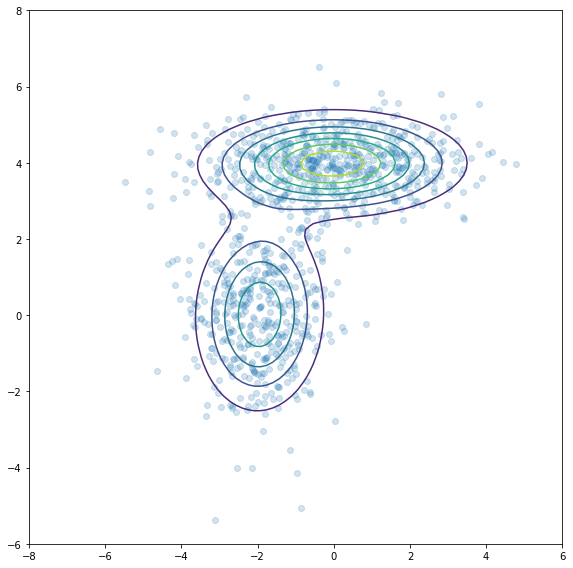

In [14]:
intervals = 101
ys = np.linspace(-8,8,intervals)
X, Y = np.meshgrid(ys, ys)
_ys = np.vstack([X.ravel(), Y.ravel()]).T

z = np.zeros(len(_ys))
for pi, mu, sigma in zip(pis1, mus1, sigmas1):
    z += pi*mvn(mu, sigma).pdf(_ys)
z = z.reshape((intervals, intervals))

plt.figure(figsize=(12,8))
ax = plt.subplot(111)
plt.scatter(xs[:,0], xs[:,1], alpha=0.2)
plt.contour(X, Y, z, N=10)
plt.axis([-8,6,-6,8])
ax.axes.set_aspect('equal')
plt.tight_layout()